# Redo the plot for the manuscript

PDFstream v0.4.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import xarray as xr
from bg_mpl_stylesheet.bg_mpl_stylesheet import bg_mpl_style

plt.style.use(bg_mpl_style)

In [2]:
from pdfstream.units import LABELS
from pdfstream.utils.jupyter import FigExporter

## Utilities

In [3]:
exporter = FigExporter("/Users/sst/project/papers/19st_tio2b/paper/figures/", dpi=400)

## Fit results

In [4]:
results = xr.load_dataset("figure_data/fit_results.nc")

# edit labels
get_label0 = np.vectorize(lambda x: "\n".join(x.split("\n")[:-1]))
get_label1 = np.vectorize(lambda x: "\n".join(x.split("\n")[-1:]))
results["label0"] = get_label0(results.label)
results["label1"] = get_label1(results.label)

# show
results

<xarray.Dataset>
Dimensions:  (index0: 10001, index1: 4841, label0: 5, label1: 5, model: 5, result: 3, type: 2)
Coordinates:
  * type     (type) object 'r' 'g'
  * model    (model) object 'a' 'b' 'c' 'd' 'e'
  * result   (result) object 'r' 'g' 'gcalc'
  * label0   (label0) <U111 '$G(r) = f^{spherical}_{bronze}(r) G_{bronze}(r)$...
  * label1   (label1) <U13 '$R_w$ = 0.207' '$R_w$ = 0.203' ... '$R_w$ = 0.116'
Dimensions without coordinates: index0, index1
Data variables:
    raw      (type, index0) float64 0.0 0.01 0.02 ... 0.001148 0.00147 0.001737
    data     (model, result, index1) float64 1.6 1.61 ... -2.216e-05 -0.0002396
    label    (model) object '$G(r) = f^{spherical}_{bronze}(r) G_{bronze}(r)$...

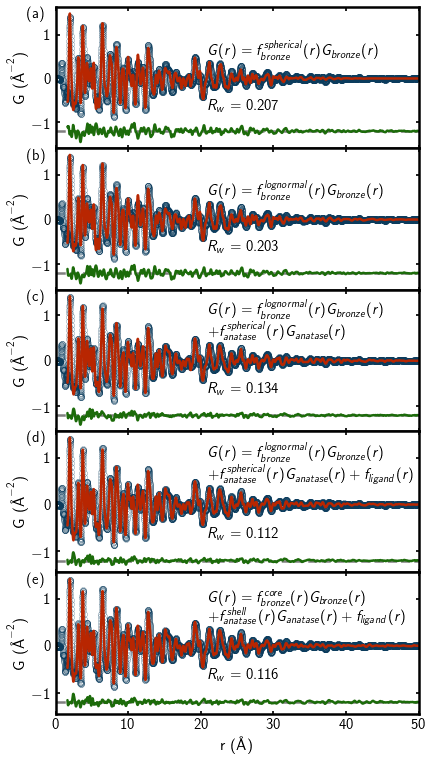

In [5]:
fig = plt.figure(figsize=(1 * 6.5, 2 * 6.5))
axes = list(map(fig.add_subplot, GridSpec(5, 1, hspace=0)));
n = len(axes)
titles = ["(a)", "(b)", "(c)", "(d)", "(e)"]

lines0 = [ax.plot(*results.raw, "o", mfc="none") for ax in axes]
lines1 = [ax.plot(res[0], res[2], "-") for ax, res in zip(axes, results.data)]
lines2 = [ax.axhline(-1.2, ls='--', c="gray") for ax in axes]
lines3 = [ax.plot(res[0], res[1] - res[2] - 1.2) for ax, res in zip(axes, results.data)]
texts0 = [ax.annotate(lab.item(), xy=(21, 0.53)) for ax, lab in zip(axes, results.label0)]
texts1 = [ax.annotate(lab.item(), xy=(21, -0.70)) for ax, lab in zip(axes, results.label1)]
for i in range(n):
    axes[i].annotate(titles[i], (-0.08, 0.92), xycoords='axes fraction')

xbounds = [ax.set_xbound(0, 50) for ax in axes]
_ = [ax.set_xticklabels([]) for ax in axes[:-1]]
xlabels = [ax.set_xlabel(LABELS.fgr[0]) for ax in axes]
ylabels = [ax.set_ylabel(LABELS.fgr[1]) for ax in axes]

In [7]:
exporter("example-fgr-panels.pdf", fig=fig);